In [1]:
import signac
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

project = signac.get_project(root='../')
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)
df.head()

,L,NPROCS,T,data_dump_interval,job_type,output_type,trials,_status,analysis_output_time,analysis_time,...,ete_simulation_time,frames_transfer_time,modify_time,output_time,read_frames_time,root,signac_id,simulation_time,statepoint,transfer_time
01a30f734d87dc6851d11b12f21109dd,30,1,1,20000,plumed_sequential,dcd,2,{'a4md/01a30f73/initialize/0000/4c56be1cbfcbd7...,3.230566,11.862725,...,119.608684,0.302709,13.3850,0.016182,0.302709,/home/sthomas/projects/a4md/project/workspace,01a30f734d87dc6851d11b12f21109dd,91.9113,"{'NPROCS': 1, 'T': 1, 'L': 30, 'data_dump_inte...",0.302709
03a22b628fcb839b06abab2091452e1e,30,1,1,5000,plumed_sequential,dcd,1,{'a4md/03a22b62/initialize/0000/aa6b92d4bb80ba...,3.115199,28.955777,...,136.892274,0.845025,30.6750,0.016412,0.845025,/home/sthomas/projects/a4md/project/workspace,03a22b628fcb839b06abab2091452e1e,91.5642,"{'NPROCS': 1, 'T': 1, 'L': 30, 'data_dump_inte...",0.845025
0439b7a3f3ae78e67ef1f614e9a2ea82,30,1,1,20000,plumed_sequential,xyz,2,{'a4md/0439b7a3/initialize/0000/d757f04751b518...,3.140502,11.565282,...,118.568971,0.282215,13.0060,0.016179,0.282215,/home/sthomas/projects/a4md/project/workspace,0439b7a3f3ae78e67ef1f614e9a2ea82,91.4451,"{'NPROCS': 1, 'T': 1, 'L': 30, 'data_dump_inte...",0.282215
05b3259349507835c423f7e82b324ed3,30,1,1,20000,traditional,xyz,1,{'a4md/05b32593/initialize/0000/59cbe50cdaa230...,2.952928,11.650455,...,104.409320,0.747621,3.9725,0.029174,0.718447,/home/sthomas/projects/a4md/project/workspace,05b3259349507835c423f7e82b324ed3,92.0877,"{'NPROCS': 1, 'T': 1, 'L': 30, 'data_dump_inte...",0.718447
05c9bb9c543eb59c37376b79d53d748f,30,1,1,500,plumed_sequential,xyz,1,{'a4md/05c9bb9c/initialize/0000/1cd137fbb61738...,3.143685,232.741732,...,345.078681,5.835583,239.7800,0.018447,5.835583,/home/sthomas/projects/a4md/project/workspace,05c9bb9c543eb59c37376b79d53d748f,91.1604,"{'NPROCS': 1, 'T': 1, 'L': 30, 'data_dump_inte...",5.835583


In [2]:
def get_sim_time(log_file): # Modify and Output is left out):
    sim_time=0
    sim_time_labels = ['Pair','Neigh','Comm','Other']
    with open(log_file) as fp:
            for line in fp:
                values = line.split('|')
                if len(values)== 6 and any(label in values[0] for label in sim_time_labels):
                    values = line.split('|')
                    sim_time += float(values[2])
                
    return sim_time

def get_sim_out_time(log_file): # Modify and Output is left out):
    sim_time=0
    sim_time_labels = ['Output']
    with open(log_file) as fp:
            for line in fp:
                values = line.split('|')
                if len(values)== 6 and any(label in values[0] for label in sim_time_labels):
                    values = line.split('|')
                    sim_time += float(values[2])
                
    return sim_time

def get_transfer_time(job):
    tt = 0
    if job.sp.job_type == 'traditional':
        output_time_labels = ['Ouput']#'Pair','Neigh']#,'Comm','Other']#,'Modify','Ouput']
        with job, open("log.prod", "r") as log:
            for line in log:
                values = line.split('|')
                if len(values)== 6 and any(label in values[0] for label in output_time_labels):
                    values = line.split('|')
                    tt = float(values[2]) # Adding up times for all the analysis_time_labels
                    break
        if 'read_frames_time' in job.document:
            tt += job.document['read_frames_time']
        else:
            raise ValueError('read_frames_time not found in job document')
        #if 'analysis_output_time' in job.document:
        #    tt += job.document['analysis_output_time']
        #else:
        #    raise ValueError('analysis_output_time not found in job document')

    else:
        #job.document['ete_analysis_time'] = get_ete_analysis_time(job)
        if 'analysis_time' in job.document: # analysis time is written from the analysis script
            tt = job.document['ete_analysis_time']-job.document['analysis_time']
        else:
            raise ValueError('analysis_time is not in the job document.')
        if 'analysis_output_time' in job.document:
            tt -= job.document['analysis_output_time']
        else:
            raise ValueError('analysis_output_time not found in job document')

    return tt

#df['simulation time']=get_sim_time(project.open_job(df.signac_id.values).fn('log.prod'))
for jobid in df.index:
    job=project.open_job(id=jobid)
    job.document.output_time = get_sim_out_time(job.fn('log.prod'))
    job.document.transfer_time = get_transfer_time(job)
    if 'plumed' in job.sp.job_type:
        #print('read_frames_time' in job.document, job.sp.job_type)
        job.document['frames_transfer_time'] = job.document.transfer_time# - job.document.analysis_output_time
    else:
        job.document['frames_transfer_time'] = job.document.output_time + job.document.read_frames_time

df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)

60


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(-9.30556,0.5,'End-to-end Workflow Time [s]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


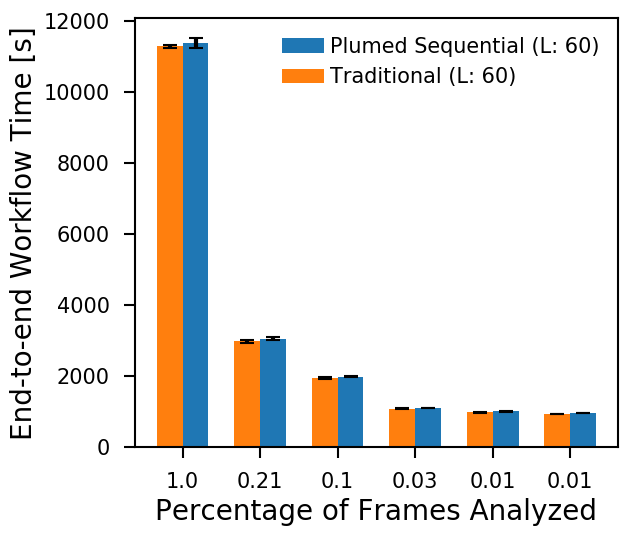

In [3]:
df_filtered = df[(df.L==60)&
                 (df.output_type=='dcd')&
                 (df.data_dump_interval>=10)]
df_sorted = df_filtered.sort_values('L', ascending=True)
for i,(L,df_L_grp) in enumerate(df_sorted.groupby('L')):
    print(L)
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):
        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            num_dumps = 20000#(20000/ddi)+1
            num_frames = round(((20000/ddi)+1)/20000*100,2)
            if (job_type=='traditional'):
                a_times.append(df_grp.ete_simulation_time.mean()+
                               df_grp.analysis_time.mean()+
                               df_grp.transfer_time.mean())
                a_times_sem.append((df_grp.ete_simulation_time.sem()**2+
                                    df_grp.analysis_time.sem()**2+
                                   df_grp.transfer_time.sem()**2)**0.5)
            else:
                a_times.append(df_grp.ete_simulation_time.mean())
                a_times_sem.append(df_grp.ete_simulation_time.sem())
            dump_intervals.append(num_frames)#ddi)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*3 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='traditional':
            line_style='--'
            xvalues = xvals-bar_width/2
            #print(xvalues)
        else:
            line_style='-'
            xvalues = xvals+bar_width/2
            #print(xvalues)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                zorder=i,
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label='{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
#plt.ylim(0,0.05)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Percentage of Frames Analyzed', fontsize=20)
plt.ylabel('End-to-end Workflow Time [s]', fontsize=20)

60
plumed_sequential
traditional


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(-9.30556,0.5,'End-to-end Workflow Time [s]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


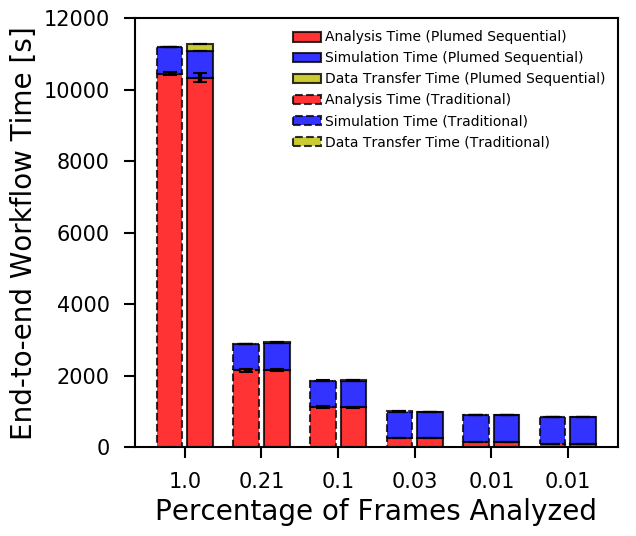

In [4]:
df_filtered = df[(df.L==60)&
                 (df.output_type=='dcd')&
                 #(df.job_type=='traditional')&
                 (df.data_dump_interval<=20000)]
df_sorted = df_filtered.sort_values('L', ascending=True)
for i,(L,df_L_grp) in enumerate(df_sorted.groupby('L')):
    print(L)
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):
        print(job_type)
        dump_intervals = []
        s_times = []
        a_times = []
        t_times = []
        a_times_sem = []
        s_times_sem = []
        t_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            num_dumps = 20000#(20000/ddi)+1
            num_frames = round(((20000/ddi)+1)/20000*100,2)
            a_times.append(df_grp.analysis_time.mean())
            s_times.append(df_grp.simulation_time.mean())
            t_times.append(df_grp.transfer_time.mean())
            a_times_sem.append(df_grp.analysis_time.sem())
            s_times_sem.append(df_grp.simulation_time.sem())
            t_times_sem.append(df_grp.transfer_time.sem())
            dump_intervals.append(num_frames)
            #print(a_times_sem)
        
        total_time = np.asarray(a_times)+np.asarray(s_times)+np.asarray(t_times)
        bar_width=100
        spacing = bar_width*3 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='traditional':
            line_style='--'
            xvalues = xvals-(bar_width/2)-(bar_width*0.1)
            #print(xvalues)
        else:
            line_style='-'
            xvalues = xvals+(bar_width/2)+(bar_width*0.1)
            #print(xvalues)
        
        
        #print('p0 get label',p0[0],p0[1],p0[2],p0[3],p0[4],p0[5])
            
        p1 = plt.bar(xvalues,
                    a_times,
                    yerr=a_times_sem,
                    color='r',
                     ls=line_style,
                     edgecolor='k',
                     lw=1.5,
                    #zorder=0,
                    align='center', alpha=0.8, ecolor='black', capsize=5, width=bar_width,
                    label='{} ({})'.format('Analysis Time',str.title(job_type.replace('_',' '))))
        
        p2 = plt.bar(xvalues,
                    s_times,
                    yerr=s_times_sem,
                    bottom=a_times,
                    color='b',
                     ls=line_style,
                     edgecolor='k',
                     lw=1.5,
                    #zorder=0,
                    align='center', alpha=0.8, ecolor='k', capsize=5, width=bar_width,
                    label='{} ({})'.format('Simulation Time',str.title(job_type.replace('_',' '))))
        
        p3 = plt.bar(xvalues,
                    t_times,
                    yerr=t_times_sem,
                    bottom=np.asarray(a_times)+np.asarray(s_times),
                    color='y',
                     ls=line_style,
                     edgecolor='k',
                     lw=1.5,
                    #zorder=0,
                    align='center', alpha=0.8, ecolor='black', capsize=5, width=bar_width,
                    label='{} ({})'.format('Data Transfer Time',str.title(job_type.replace('_',' '))))
        
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

#plt.legend((p1[0], p2[0], p3[0]), ('Analysis Time', 'Simulation Time', 'Transfer Time'),fontsize=15)
plt.legend(fontsize=10)
plt.tight_layout()
plt.ylim(0,12000)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Percentage of Frames Analyzed', fontsize=20)
plt.ylabel('End-to-end Workflow Time [s]', fontsize=20)

60


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(-2.68056,0.5,'Simulation Time / Frame [s]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


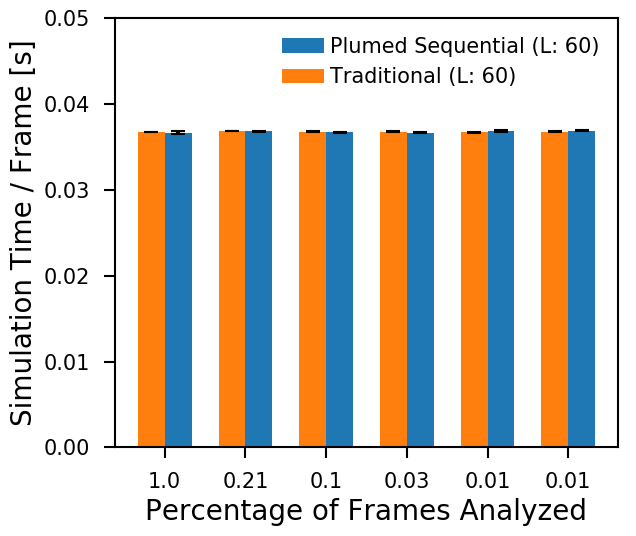

In [5]:
import numpy as np

df_filtered = df[(df.L==60)&(df.output_type=='dcd')&
                 (df.data_dump_interval>=100)]
df_sorted = df_filtered.sort_values('L', ascending=True)
for i,(L,df_L_grp) in enumerate(df_sorted.groupby('L')):
    print(L)
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):

        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            num_dumps = 20000#(20000/ddi)+1
            num_frames = round(((20000/ddi)+1)/20000*100,2)
            a_times.append(df_grp.simulation_time.mean()/num_dumps)
            #print(df_grp.ete_simulation_time)
            a_times_sem.append(df_grp.simulation_time.sem()/num_dumps)
            dump_intervals.append(num_frames)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*3 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='traditional':
            line_style='--'
            xvalues = xvals-bar_width/2
            #print(xvalues)
        else:
            line_style='-'
            xvalues = xvals+bar_width/2
            #print(xvalues)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                zorder=i,
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label='{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
plt.ylim(0,0.05)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Percentage of Frames Analyzed', fontsize=20)
plt.ylabel('Simulation Time / Frame [s]', fontsize=20)

60


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(30.4444,0.5,'Analysis Time / Frame [s]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


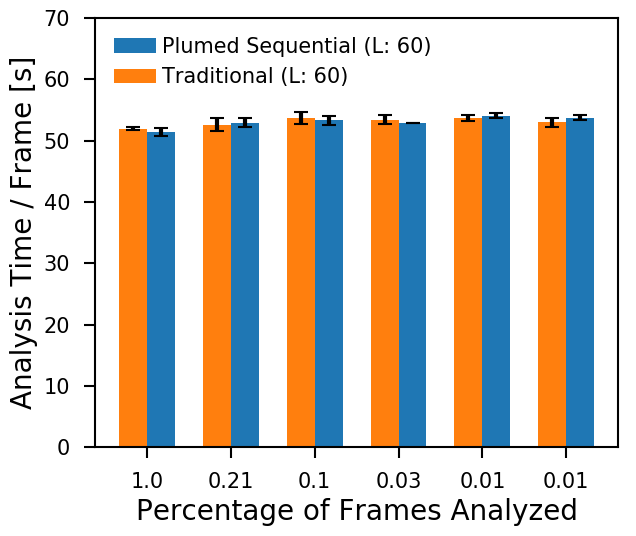

In [6]:
import numpy as np

df_filtered = df[(df.L==60)&(df.output_type=='dcd')&
                 (df.data_dump_interval>=100)]
df_sorted = df_filtered.sort_values('L', ascending=True)
for i,(L,df_L_grp) in enumerate(df_sorted.groupby('L')):
    print(L)
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):

        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            num_dumps = (20000/ddi)+1
            num_frames = round(num_dumps/20000*100,2)
            a_times.append(df_grp.analysis_time.mean()/num_dumps)
            #print(df_grp.ete_simulation_time)
            a_times_sem.append(df_grp.analysis_time.sem()/num_dumps)
            dump_intervals.append(num_frames)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*3 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='traditional':
            line_style='--'
            xvalues = xvals-bar_width/2
            #print(xvalues)
        else:
            line_style='-'
            xvalues = xvals+bar_width/2
            #print(xvalues)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                zorder=i,
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label='{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
plt.ylim(0,70)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Percentage of Frames Analyzed', fontsize=20)
plt.ylabel('Analysis Time / Frame [s]', fontsize=20)

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(23.8194,0.5,'Data Transfer Time / Frame (s)')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


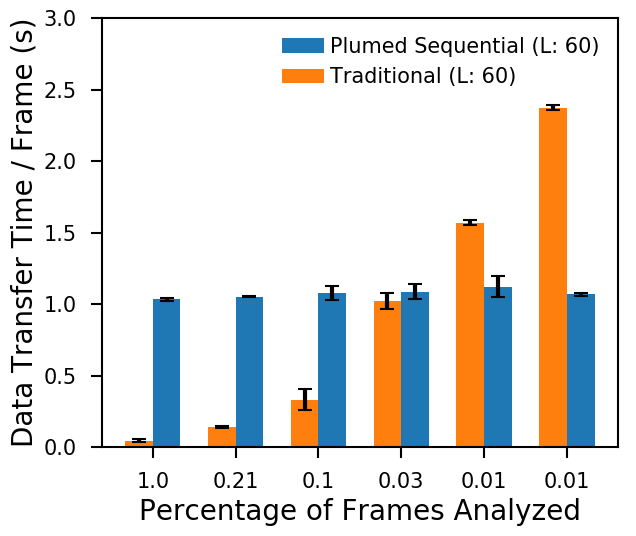

In [12]:
import numpy as np

df_filtered = df[(df.L==60)&
                 (df.output_type=='dcd')&
                 (df.data_dump_interval>=100)]
for i,(L,df_L_grp) in enumerate(df_filtered.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):

        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            num_dumps = (20000/ddi)+1
            num_frames = round(num_dumps/20000*100,2)
            a_times.append(df_grp.transfer_time.mean()/num_dumps)
            #print(df_grp.ete_simulation_time)
            a_times_sem.append(df_grp.transfer_time.sem()/num_dumps)
            dump_intervals.append(num_frames)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*3 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='traditional':
            line_style='--'
            xvalues = xvals-bar_width/2
            #print(xvalues)
        else:
            line_style='-'
            xvalues = xvals+bar_width/2
            #print(xvalues)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label='{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.legend(fontsize=15, ncol=1)
plt.tight_layout()
plt.ylim(0,3)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Percentage of Frames Analyzed', fontsize=20)
plt.ylabel('Data Transfer Time / Frame (s)', fontsize=20)

plumed_sequential [1.0335580310699213, 1.0537396072948846, 1.080532578649262, 1.0872130987092816, 1.1226248452911751, 1.0705260724499794]
traditional [0.11535629731548663, 0.14988991344995617, 0.3423188384240511, 1.1054365829395651, 1.6108672374447188, 2.432272217319608]


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(23.8194,0.5,'Frames Transfer Time / Frame [s]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


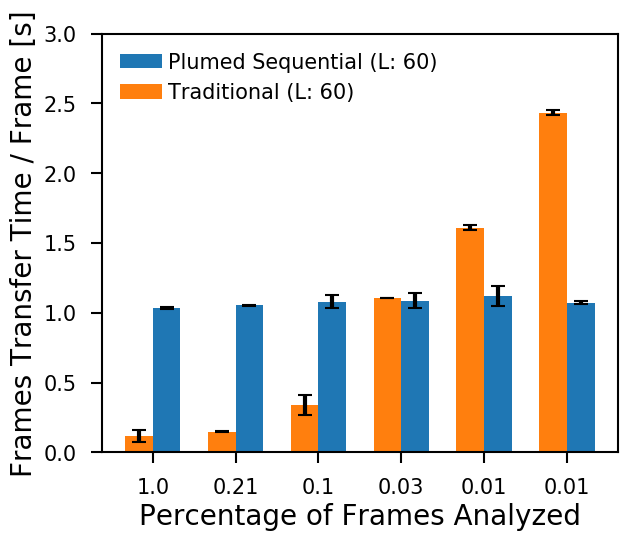

In [31]:
import numpy as np

df_filtered = df[(df.L==60)&
                 (df.output_type=='dcd')&
                 #(df.job_type=='traditional')&
                 (df.data_dump_interval>=100)]
for i,(L,df_L_grp) in enumerate(df_filtered.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):

        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            num_dumps = (20000/ddi)+1
            num_frames = round(num_dumps/20000*100,2)
            a_times.append(df_grp.frames_transfer_time.mean()/num_dumps)
            #print(df_grp.ete_simulation_time)
            a_times_sem.append(df_grp.frames_transfer_time.sem()/num_dumps)
            dump_intervals.append(num_frames)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*3 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='traditional':
            line_style='--'
            xvalues = xvals-bar_width/2
            #print(xvalues)
        else:
            line_style='-'
            xvalues = xvals+bar_width/2
            #print(xvalues)
        print(job_type,a_times)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                #color='#ff7f0e',
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label='{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.legend(fontsize=15, ncol=1)
plt.tight_layout()
plt.ylim(0,3)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Percentage of Frames Analyzed', fontsize=20)
plt.ylabel('Frames Transfer Time / Frame [s]', fontsize=20)

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(30.4444,0.5,'Analysis Output Time / Frame [s]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


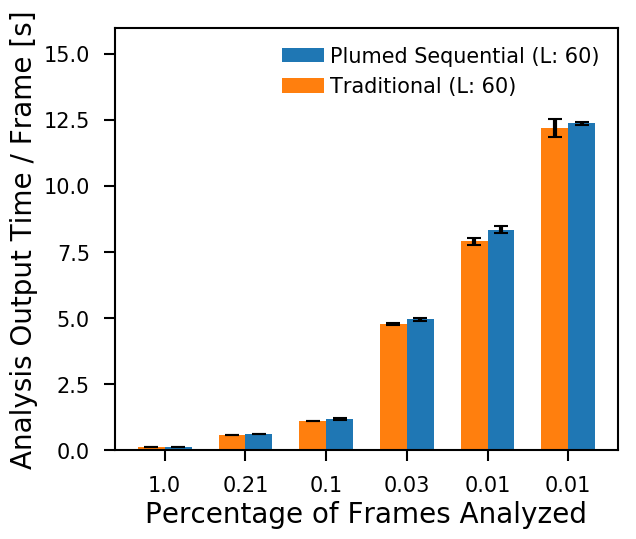

In [9]:
import numpy as np

df_filtered = df[(df.L==60)&
                 (df.output_type=='dcd')&
                 (df.data_dump_interval>=100)]
for i,(L,df_L_grp) in enumerate(df_filtered.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):

        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            num_dumps = (20000/ddi)+1
            num_frames = round(num_dumps/20000*100,2)
            a_times.append(df_grp.analysis_output_time.mean()/num_dumps)
            #print(df_grp.ete_simulation_time)
            a_times_sem.append(df_grp.analysis_output_time.sem()/num_dumps)
            dump_intervals.append(num_frames)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*3 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='traditional':
            line_style='--'
            xvalues = xvals-bar_width/2
            #print(xvalues)
        else:
            line_style='-'
            xvalues = xvals+bar_width/2
            #print(xvalues)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label='{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.legend(fontsize=15, ncol=1)
plt.tight_layout()
plt.ylim(0,16)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Percentage of Frames Analyzed', fontsize=20)
plt.ylabel('Analysis Output Time / Frame [s]', fontsize=20)

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(23.8194,0.5,'Frames Transfer Time / Frame [s]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


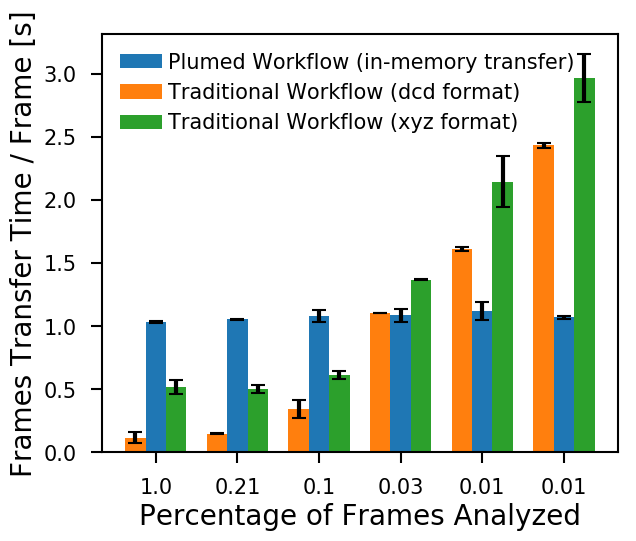

In [38]:
import numpy as np

df_filtered = df[(df.L==60)&
                 #(df.output_type=='dcd')&
                 #(df.job_type=='traditional')&
                 #((df.job_type=='traditional')|((df.job_type=='plumed')&(df.output_type=='dcd')))&
                 (df.data_dump_interval>=100)]
for i,(job_type,df_job_type_grp) in enumerate(df_filtered.groupby('job_type')):
    for i,(L,df_L_grp) in enumerate(df_job_type_grp.groupby('L')):
        for i,(output_type,df_output_type_grp) in enumerate(df_L_grp.groupby('output_type')):
            dump_intervals = []
            a_times = []
            a_times_sem = []
            if job_type == 'traditional':
                df_sub_filter = df_output_type_grp
            else:
                df_sub_filter = df_output_type_grp[df_output_type_grp.output_type=='dcd']
            for j,(ddi,df_grp) in enumerate(df_sub_filter.groupby('data_dump_interval')):
                num_dumps = (20000/ddi)+1
                num_frames = round(num_dumps/20000*100,2)
                a_times.append(df_grp.frames_transfer_time.mean()/num_dumps)
                #print(df_grp.ete_simulation_time)
                a_times_sem.append(df_grp.frames_transfer_time.sem()/num_dumps)
                dump_intervals.append(num_frames)
                #print(a_times_sem)
            bar_width=100
            spacing = bar_width*4 # times the barwidth
            xvals = (np.arange(len(dump_intervals))+1)*(spacing)
            #print(xvals)
            legend = None
            if job_type == 'traditional':
                if output_type=='dcd':
                    line_style='--'
                    xvalues = xvals-bar_width
                    legend = 'Traditional Workflow (dcd format)'
                    #print(xvalues)
                else:
                    line_style='-'
                    xvalues = xvals+bar_width
                    legend = 'Traditional Workflow (xyz format)'
                    #print(xvalues)
            elif output_type == 'dcd':
                xvalues = xvals
                legend = 'Plumed Workflow (in-memory transfer)'
            if legend is not None:
                #print(job_type,output_type)
                plt.bar(xvalues,
                        a_times,
                        yerr=a_times_sem,
                        #color='#ff7f0e',
                        align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                        label=legend)
                plt.xticks(xvals,dump_intervals, fontsize=15)
                plt.yticks(fontsize=15)

#plt.title('DCD Format (Binary)', fontsize=15)
plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
#plt.ylim(0,15)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Percentage of Frames Analyzed', fontsize=20)
plt.ylabel('Frames Transfer Time / Frame [s]', fontsize=20)

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(23.8194,0.5,'Simulation Output Time/\nFrame [s]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


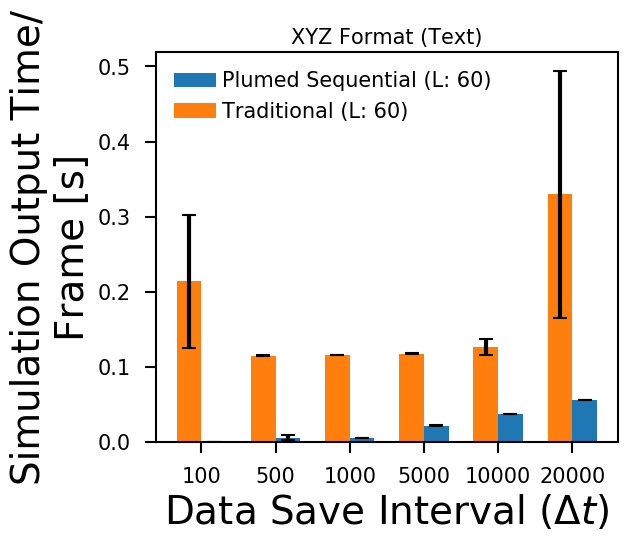

In [39]:
import numpy as np

df_filtered = df[(df.L==60)&
                 (df.output_type=='xyz')&
                 #(df.job_type=='traditional')&
                 (df.data_dump_interval>=100)]
for i,(L,df_L_grp) in enumerate(df_filtered.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):

        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            num_dumps = (20000/ddi)+1
            a_times.append(df_grp.output_time.mean()/num_dumps)
            #print(df_grp.ete_simulation_time)
            a_times_sem.append(df_grp.output_time.sem()/num_dumps)
            dump_intervals.append(ddi)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*3 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='traditional':
            line_style='--'
            xvalues = xvals-bar_width/2
            #print(xvalues)
        else:
            line_style='-'
            xvalues = xvals+bar_width/2
            #print(xvalues)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                #color='#ff7f0e',
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label='{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.title('XYZ Format (Text)', fontsize=15)
plt.legend(fontsize=15, ncol=1)
plt.tight_layout()
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Data Save Interval ($\Delta t$)')
plt.ylabel('Simulation Output Time/\nFrame [s]')